## Clustering

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
X.shape

(100, 2)

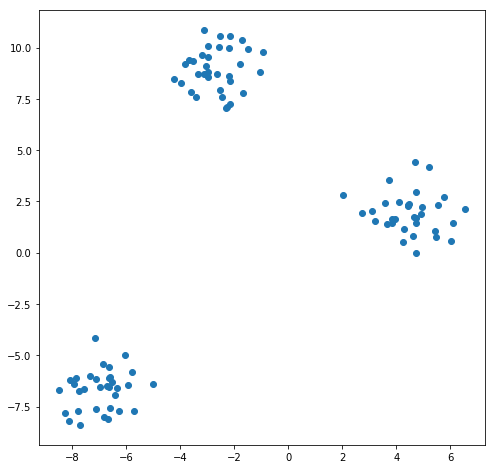

In [6]:
plt.figure(figsize = (8,8))
plt.scatter(X[:, 0], X[:, 1]);

In [9]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3, random_state = 42)

In [12]:
labels = kmeans.fit_predict(X)
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2])

NOTE: the confusion matrix and accuracy are not used as metrics to evaluate the performance of Kmeans. Adjusted_rand_score is invariant to the permutations of the labels 

In [14]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

1.0

## Plotting the results

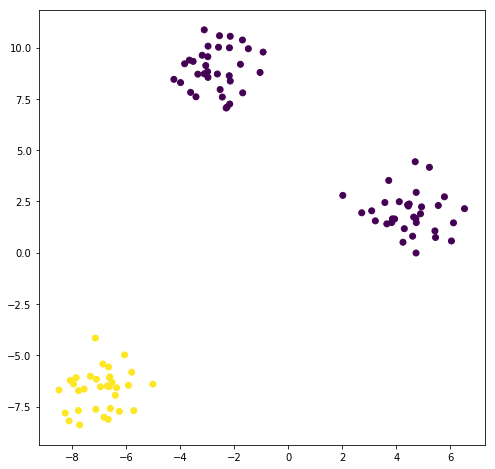

In [16]:
kmeans = KMeans(n_clusters =2, random_state = 42)
labels = kmeans.fit_predict(X)
plt.figure(figsize = (8,8))
plt.scatter(X[:,0], X[:,1], c = labels);

In [19]:
kmeans.cluster_centers_

array([[ 0.86236563,  5.48955564],
       [-6.95170962, -6.67621669]])

## The Elbow Method

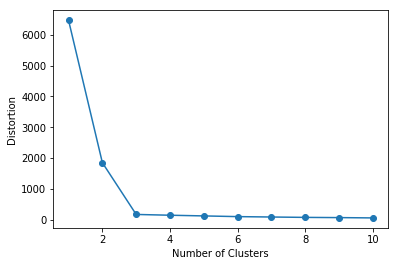

In [20]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, 
               random_state = 0)
    
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show();

We pick the pit of an elbow in this case it is 3. Note that the elbow method will not always be this easy

## Clustering assumptions 

Clustering models come with assumptions about the clusters. For k-means clustering, the model is taht all clusters have equal, speherical variance 

In general there is no guarantee that the structure found by the clustering algorithm has anything to do with what you are interested in. 

For example, below a dataset with non-isotropic clusters on which kmeans will fail: 
    

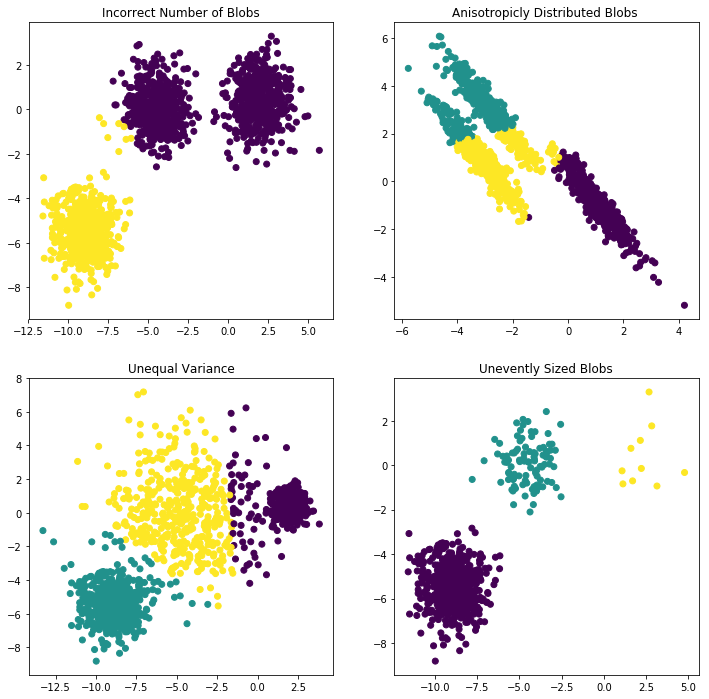

In [24]:
plt.figure(figsize = (12,12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples = n_samples, random_state = random_state)

#Incorrect number of clusters 
y_pred = KMeans(n_clusters = 2, random_state = random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Incorrect Number of Blobs')

#Anisotropicly distributed data 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters = 3, random_state = random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c = y_pred)
plt.title('Anisotropicly Distributed Blobs ')

#Different Variance 
X_varied, y_varied = make_blobs(n_samples = n_samples,
                               cluster_std = [1.0, 2.5, 0.5],
                               random_state = random_state)
y_pred = KMeans(n_clusters = 3, random_state = random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c = y_pred)
plt.title('Unequal Variance')

#Unevenly sized blobs 
X_filtered = np.vstack((X[y ==0][:500], X[y ==1][:100], X[y ==2][:10]))
y_pred = KMeans(n_clusters = 3, 
               random_state = random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c = y_pred)
plt.title('Unevently Sized Blobs');

## Clustering with Digits Data

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()

(10, 64)


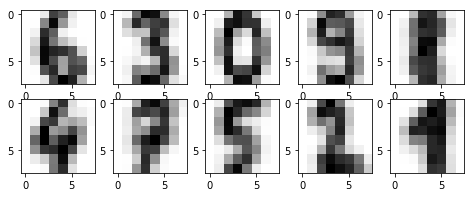

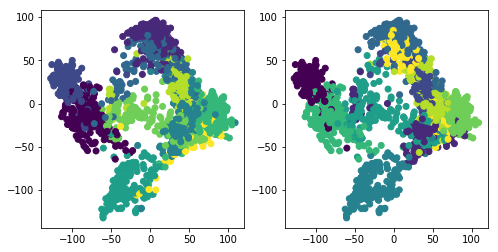

In [32]:
#Fit the data to K means 
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)

print(kmeans.cluster_centers_.shape)

#---------------------------------------------
#Visualize the clusters 
fig = plt.figure(figsize = (8, 3))
for i in range(10):
    ax = fig.add_subplot(2,5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape(8,8),
              cmap = plt.cm.binary)
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors = 10).fit_transform(digits.data)

#--------------------------------------------
#Visualize the projected data 
fig, ax = plt.subplots(1,2, figsize = (8, 4))

ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[1].scatter(X_iso[:,0], X_iso[:,1], c= digits.target);

In [33]:
adjusted_rand_score(digits.target, clusters)

0.6693732150753747